# PW 1 - Markovian models Niccolò Zoboli Erasmus Student 
Sampling of Markovian models.

The aim of this session is to program the Gibbs sampler algorithm and study it in the binary case.

In this section we consider a binary Markov random field (taking values in $E=\{0,1\}$).
The neighborhood is defined in 4-connexity and the potential of a clique of order 2 is defined by :
$U_c(0,1)=U_c(1,0)=+\beta$ and $U_c(1,1)=U_c(0,0)=0$ (the potential for singleton clique is 0).


In [1]:
import math
import random
import numpy as np
import platform
import tempfile
import os
import matplotlib.pyplot as plt
import imageio
from scipy import ndimage as ndi

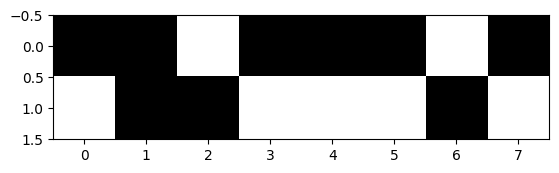

In [2]:
plt.set_cmap('gray')

sh=[2,8]

imaU=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(imaU)

#Q1
For the Ising model defined above, and the imaU generated in the previous cell, give the formula of the global energy and give its value as a function of $\beta$ for imaU.

Paper



#A1


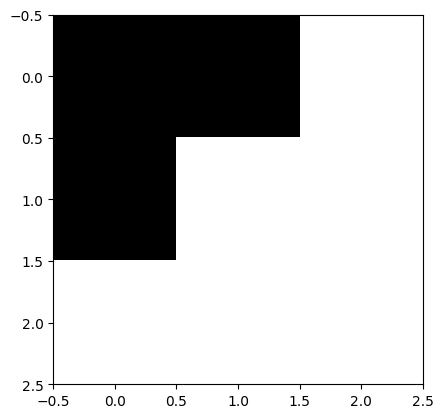

In [3]:
sh=[3,3]

imaVois=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(imaVois)

#Q2

Write the general form of the local conditional probability in a pixel $s$. For the neighborhood configuration imaVois generated by the previous code cell, compute the 2 local conditional energies (for the value 0 and for the value 1 of the central pixel), then the local conditional probabilities (as a function of $\beta$). What is the most probable class ? (NB: do the calculation for an 8-neighborhood).

Paper

#A2


## Part 1

Programming the Gibbs sampler and drawing samples of Markovian models



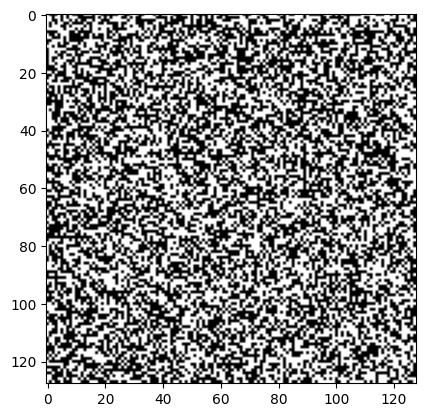

In [4]:
plt.set_cmap('gray')

sh=[128,128]

im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)

### Sampling function  
### Alle the comment and answer are on the paper 
Complete the following function which takes as input a binary image (which will be updated by Gibbs sampling) and the value of the regularization parameter.


In [5]:
def echan(im_bin,beta_reg):

    i=0;
    j=0;

    Ureg0=0;
    Ureg1=0;
    for i in range(im_bin.shape[0]):
        for j in range(im_bin.shape[1]):
          # do not change these indices
          # they allow access to neighboring pixels
          # i1,j and i2,j and i,j1 and i,j2
            i1=(i-1)%im_bin.shape[0]
            i2=(i+1)%im_bin.shape[0]
            j1=(j-1)%im_bin.shape[1]
            j2=(j+1)%im_bin.shape[1]

        # complete the calculation of energies and associated probabilities
        # energy and non-normalized proba when the pixel is put in class 0
            Ureg0 = 0
            Ureg0 = Ureg0 + beta_reg * (1 if im_bin[i, j2] == 1 else 0)
            Ureg0 = Ureg0 + beta_reg * (1 if im_bin[i1, j] == 1 else 0)
            Ureg0 = Ureg0 + beta_reg * (1 if im_bin[i2, j] == 1 else 0)
            Ureg0 = Ureg0 + beta_reg * (1 if im_bin[i, j1] == 1 else 0)
            Ureg0 = Ureg0 + beta_reg * (1 if im_bin[i1, j1] == 1 else 0)
            Ureg0 = Ureg0 + beta_reg * (1 if im_bin[i1, j2] == 1 else 0)
            Ureg0 = Ureg0 + beta_reg * (1 if im_bin[i2, j1] == 1 else 0)
            Ureg0 = Ureg0 + beta_reg * (1 if im_bin[i2, j2] == 1 else 0)
            p0=math.exp(-Ureg0);

        # energy and non-normalized proba when the pixel is put in class 1
            Ureg1 = 0
            Ureg1 = Ureg1 + beta_reg * (1 if im_bin[i1, j] == 0 else 0)
            Ureg1 = Ureg1 + beta_reg * (1 if im_bin[i2, j] == 0 else 0)
            Ureg1 = Ureg1 + beta_reg * (1 if im_bin[i, j1] == 0 else 0)
            Ureg1 = Ureg1 + beta_reg * (1 if im_bin[i, j2] == 0 else 0)
            Ureg1 = Ureg1 + beta_reg * (1 if im_bin[i2, j1] == 0 else 0)
            Ureg1 = Ureg1 + beta_reg * (1 if im_bin[i1, j1] == 0 else 0)
            Ureg1 = Ureg1 + beta_reg * (1 if im_bin[i1, j2] == 0 else 0)
            Ureg1 = Ureg1 + beta_reg * (1 if im_bin[i2, j2] == 0 else 0)
            p1=math.exp(-Ureg1);

        # sampling according to the normalized probabilities. NB: the normalization is done here
            if (p0+p1!=0.):
                if(random.uniform(0,1)<p0/(p0+p1)):
                    im_bin[i,j]=0
                else :
                    im_bin[i,j]=1

    return im_bin


By varying the value of the regularization parameter and restarting the cell, observe. You can remove the visualization during sampling and increase the number of iterations

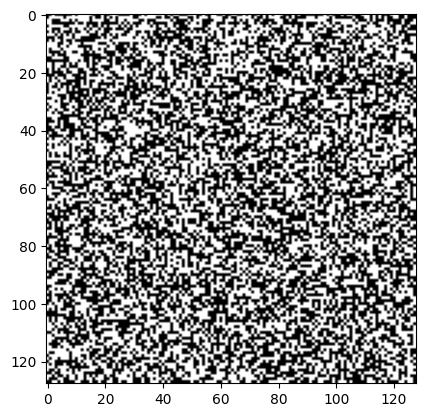

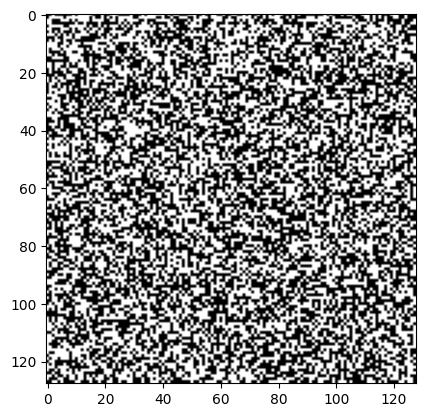

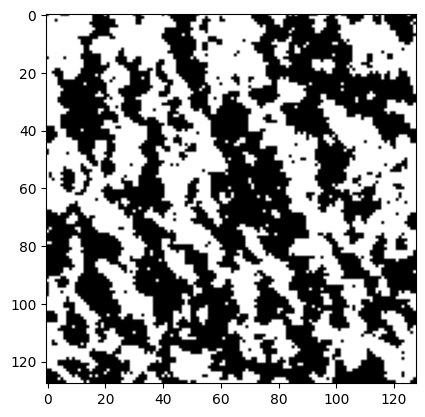

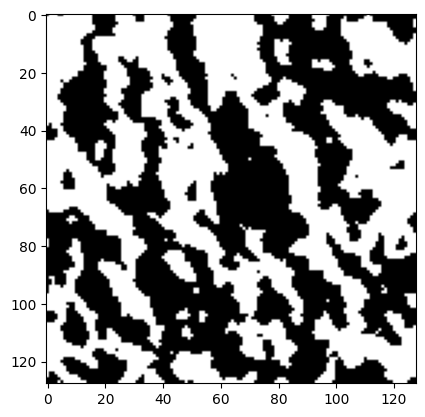

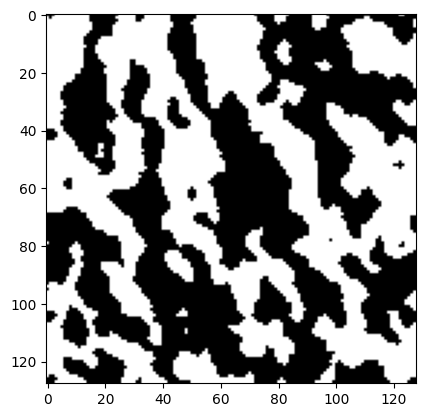

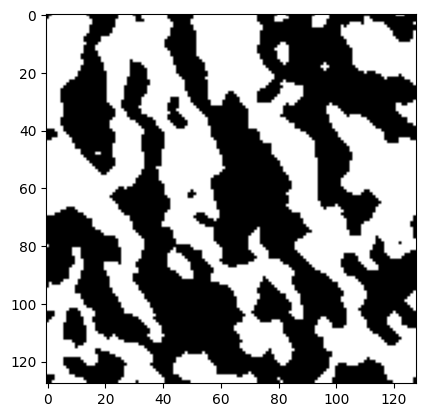

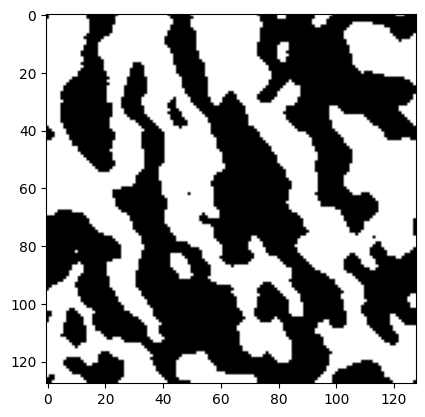

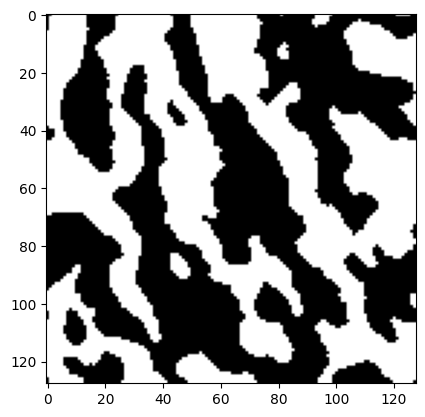

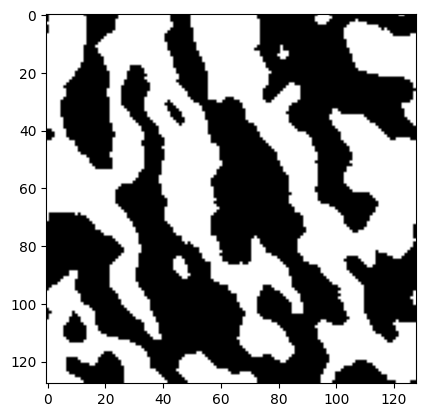

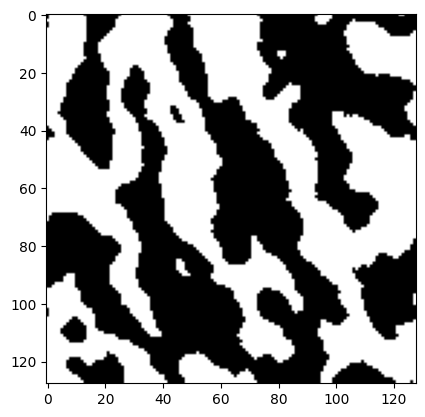

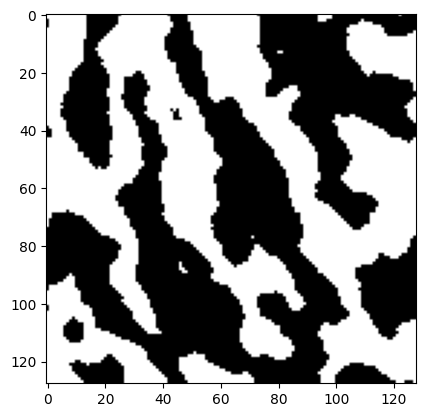

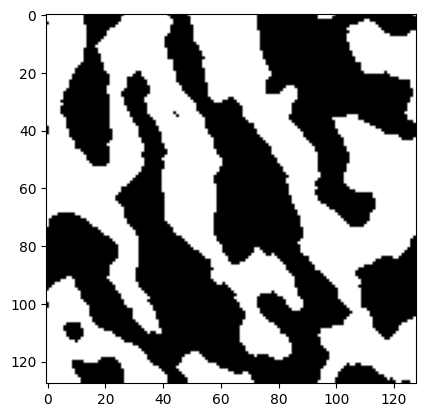

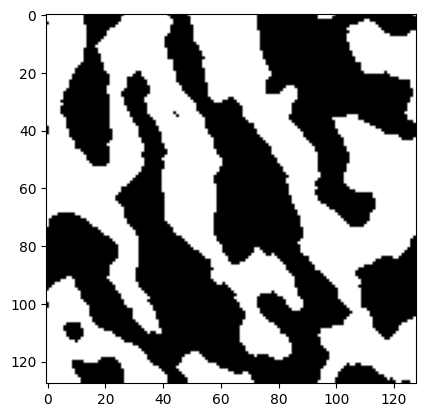

In [6]:

# random initialization of im_bin
plt.set_cmap('gray')
sh=[128,128]
im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)

beta_reg = 1.5

mafigure=plt.figure()
plt.imshow(im_bin);
mafigure.canvas.draw()
plt.show()

for n in range(10):
    echan(im_bin,beta_reg)
    plt.imshow(im_bin)
    mafigure.canvas.draw()
    plt.show(block=False)


plt.figure()
plt.imshow(im_bin)
plt.show()

#Q3
Run the program several times. Do you still get the same image? Comment on this.

#A3

Paper

#Q4

Vary $\beta$ from 0.5 to 20. Comment on the results.

Paper

#A4

Paper

#Q5
Which image minimizes the overall energy for this model?

Paper

#A5

Paper 


#Q6
Change 𝛽 and give it a negative value. Describe the result and justify it.
### Comments on Paper

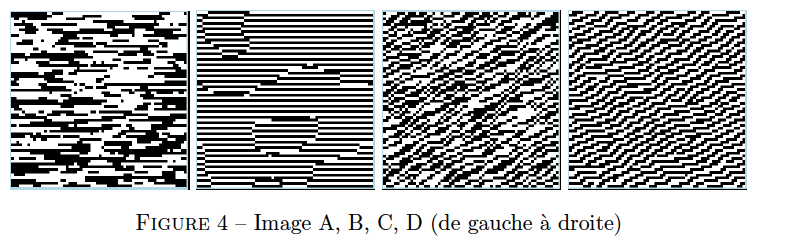

#Q7
We now work in 8-neighborhood, but still with cliques of order 2 (non-isotropic this time). For each of the following images, propose the clique potentials that allow us to obtain these realizations. Initially all clique potentials are zero.


* Image A : there is only one clique potential of order 2 which is -1.
* Image B : in addition to the previous one, there is a clique potential of order 2 which is 1. Indicate which one.
* Image C: in addition to the 2 previous ones, there is a clique potential of order 2 which is -1. Indicate which one.
* Image D: in addition to the 3 previous ones, there is a second order clique potential which is +1. Indicate which one.





#A7


In [7]:
def update_pixel_class(im_bin, beta_reg, neighbors):
    p0 = math.exp(-neighbors["Ureg0"])
    p1 = math.exp(-neighbors["Ureg1"])
    if p0 + p1 > 0:
        return 0 if random.uniform(0, 1) < p0 / (p0 + p1) else 1
    return im_bin

def echan_q7a(im_bin, beta_reg):
    rows, cols = im_bin.shape
    for x in range(rows):
        for y in range(cols):
            left = im_bin[x, (y - 1) % cols]
            right = im_bin[x, (y + 1) % cols]
            neighbors = {
                "Ureg0": -(2 - (left + right)) * beta_reg,
                "Ureg1": -(left + right) * beta_reg
            }
            im_bin[x, y] = update_pixel_class(im_bin[x, y], beta_reg, neighbors)
    return im_bin

def echan_q7b(im_bin, beta_reg):
    rows, cols = im_bin.shape
    for x in range(rows):
        for y in range(cols):
            left, right = im_bin[x, (y - 1) % cols], im_bin[x, (y + 1) % cols]
            up, down = im_bin[(x - 1) % rows, y], im_bin[(x + 1) % rows, y]
            neighbors = {
                "Ureg0": -(2 - (left + right) + (2 - (up + down))) * beta_reg,
                "Ureg1": -(left + right + up + down) * beta_reg
            }
            im_bin[x, y] = update_pixel_class(im_bin[x, y], beta_reg, neighbors)
    return im_bin

def echan_q7c(im_bin, beta_reg):
    rows, cols = im_bin.shape
    for x in range(rows):
        for y in range(cols):
            left, right = im_bin[x, (y - 1) % cols], im_bin[x, (y + 1) % cols]
            up, down = im_bin[(x - 1) % rows, y], im_bin[(x + 1) % rows, y]
            diag1, diag2 = im_bin[(x - 1) % rows, (y + 1) % cols], im_bin[(x + 1) % rows, (y - 1) % cols]
            neighbors = {
                "Ureg0": -(2 - (left + right) + (2 - (up + down)) - (2 - (diag1 + diag2))) * beta_reg,
                "Ureg1": -(left + right + up + down - diag1 - diag2) * beta_reg
            }
            im_bin[x, y] = update_pixel_class(im_bin[x, y], beta_reg, neighbors)
    return im_bin

def echan_q7d(im_bin, beta_reg):
    rows, cols = im_bin.shape
    for x in range(rows):
        for y in range(cols):
            left, right = im_bin[x, (y - 1) % cols], im_bin[x, (y + 1) % cols]
            up, down = im_bin[(x - 1) % rows, y], im_bin[(x + 1) % rows, y]
            diag1, diag2 = im_bin[(x - 1) % rows, (y + 1) % cols], im_bin[(x + 1) % rows, (y - 1) % cols]
            diag3, diag4 = im_bin[(x - 1) % rows, (y - 1) % cols], im_bin[(x + 1) % rows, (y + 1) % cols]
            neighbors = {
                "Ureg0": -(2 - (left + right) + (2 - (up + down)) - (2 - (diag1 + diag2)) + (2 - (diag3 + diag4))) * beta_reg,
                "Ureg1": -(left + right + up + down - diag1 - diag2 + diag3 + diag4) * beta_reg
            }
            im_bin[x, y] = update_pixel_class(im_bin[x, y], beta_reg, neighbors)
    return im_bin


### Figure A

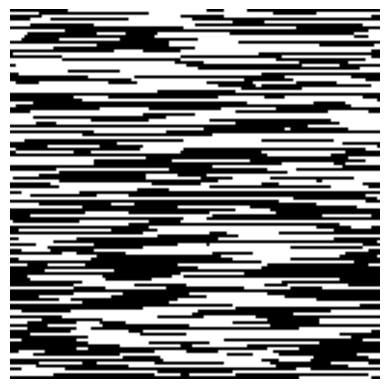

In [8]:
def update_pixel(im_bin, beta_reg, neighbors):
    p0 = np.exp(-neighbors["Ureg0"])
    p1 = np.exp(-neighbors["Ureg1"])
    return 0 if random.uniform(0, 1) < p0 / (p0 + p1) else 1

def echan(im_bin, beta_reg):
    rows, cols = im_bin.shape
    for x in range(rows):
        for y in range(cols):
            left = im_bin[x, (y - 1) % cols]
            right = im_bin[x, (y + 1) % cols]
            neighbors = {
                "Ureg0": -(2 - (left + right)) * beta_reg,
                "Ureg1": -(left + right) * beta_reg
            }
            im_bin[x, y] = update_pixel(im_bin[x, y], beta_reg, neighbors)
    return im_bin

sh = [128, 128]
im_bin = 2 - np.ceil(2 * np.random.rand(*sh))
beta_reg = 10

for _ in range(50):
    im_bin = echan(im_bin, beta_reg)

plt.figure()
plt.imshow(im_bin, cmap="gray")
plt.axis("off")
plt.show()


### Figure B

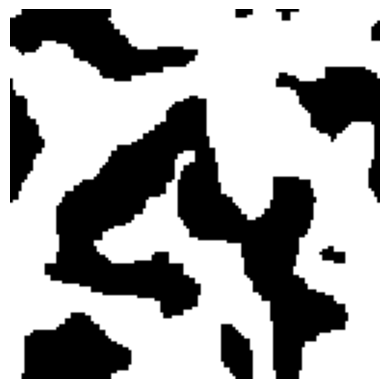

In [9]:
def update_pixel(im_bin, beta_reg, neighbors):
    p0 = np.exp(-neighbors["Ureg0"])
    p1 = np.exp(-neighbors["Ureg1"])
    return 0 if random.uniform(0, 1) < p0 / (p0 + p1) else 1

def echan(im_bin, beta_reg):
    rows, cols = im_bin.shape
    for x in range(rows):
        for y in range(cols):
            left, right = im_bin[x, (y - 1) % cols], im_bin[x, (y + 1) % cols]
            up, down = im_bin[(x - 1) % rows, y], im_bin[(x + 1) % rows, y]
            neighbors = {
                "Ureg0": -(2 - (left + right) + (2 - (up + down))) * beta_reg,
                "Ureg1": -(left + right + up + down) * beta_reg
            }
            im_bin[x, y] = update_pixel(im_bin[x, y], beta_reg, neighbors)
    return im_bin

sh = [128, 128]
im_bin = 2 - np.ceil(2 * np.random.rand(*sh))
beta_reg = 10

for _ in range(50):
    im_bin = echan(im_bin, beta_reg)

plt.figure()
plt.imshow(im_bin, cmap="gray")
plt.axis("off")
plt.show()


### Figure C 

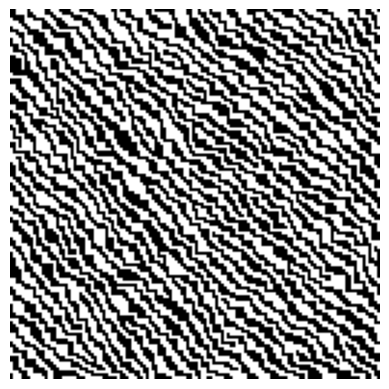

In [10]:
def update_pixel(im_bin, beta_reg, neighbors):
    p0 = np.exp(-neighbors["Ureg0"])
    p1 = np.exp(-neighbors["Ureg1"])
    return 0 if random.uniform(0, 1) < p0 / (p0 + p1) else 1

def echan(im_bin, beta_reg):
    rows, cols = im_bin.shape
    for x in range(rows):
        for y in range(cols):
            left, right = im_bin[x, (y - 1) % cols], im_bin[x, (y + 1) % cols]
            up, down = im_bin[(x - 1) % rows, y], im_bin[(x + 1) % rows, y]
            diag1, diag2 = im_bin[(x - 1) % rows, (y + 1) % cols], im_bin[(x + 1) % rows, (y - 1) % cols]
            neighbors = {
                "Ureg0": -(2 - (left + right) + (2 - (up + down)) - (2 - (diag1 + diag2))) * beta_reg,
                "Ureg1": -(left + right + up + down - diag1 - diag2) * beta_reg
            }
            im_bin[x, y] = update_pixel(im_bin[x, y], beta_reg, neighbors)
    return im_bin

sh = [128, 128]
im_bin = 2 - np.ceil(2 * np.random.rand(*sh))
beta_reg = 10

for _ in range(50):
    im_bin = echan(im_bin, beta_reg)

plt.figure()
plt.imshow(im_bin, cmap="gray")
plt.axis("off")
plt.show()


### Figure D

In [11]:
def modified_echan_q7d(image, beta):
    rows, cols = image.shape  # Get image dimensions
    for row in range(rows):
        for col in range(cols):
            # Wrap-around neighbors (toroidal boundaries)
            top = (row - 1) % rows
            bottom = (row + 1) % rows
            left = (col - 1) % cols
            right = (col + 1) % cols

            # Energy when the pixel is assigned to class 0
            energy_0 = (
                -(2 - (image[row, left] + image[row, right]))
                + (2 - (image[top, col] + image[bottom, col]))
                - (2 - (image[top, right] + image[bottom, left]))
                + (2 - (image[top, left] + image[bottom, right]))
            ) * beta
            prob_0 = math.exp(-energy_0)

            # Energy when the pixel is assigned to class 1
            energy_1 = (
                -(image[row, left] + image[row, right])
                + (image[top, col] + image[bottom, col])
                - (image[top, right] + image[bottom, left])
                + (image[top, left] + image[bottom, right])
            ) * beta
            prob_1 = math.exp(-energy_1)

            # Update pixel value based on normalized probabilities
            total_prob = prob_0 + prob_1
            if total_prob != 0:
                image[row, col] = 0 if random.uniform(0, 1) < prob_0 / total_prob else 1

    return image


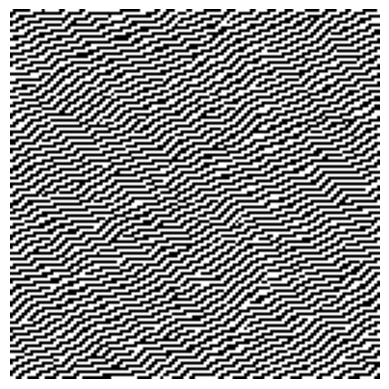

In [12]:
# Random binary image initialization
shape = [128, 128]
image = np.random.randint(0, 2, size=shape)

# Regularization parameter (beta)
beta_value = 10

# Run the algorithm for a specified number of iterations
for iteration in range(50):
    modified_echan_q7d(image, beta_value)

# Display the resulting image
plt.figure()
plt.imshow(image, cmap="gray")
plt.axis("off")
plt.show()



#Q8

Modify your program to define an Ising model with a diagonal attractive potential only (the other potentials are zero). It means that this model **encourages** similar labels (either 0 or 1) for neighboring pixels in the diagonal directions ($\pi/4$ or $3\pi/4$ directions). Comment on the result.

#A8

In [13]:
def echan(im_bin,beta_reg):

    i=0;
    j=0;

    Ureg0=0;
    Ureg1=0;
    for i in range(im_bin.shape[0]):
        for j in range(im_bin.shape[1]):
          # do not change these indices
          # they allow access to neighboring pixels
          # i1,j and i2,j and i,j1 and i,j2
            i1=(i-1)%im_bin.shape[0]
            i2=(i+1)%im_bin.shape[0]
            j1=(j-1)%im_bin.shape[1]
            j2=(j+1)%im_bin.shape[1]

        # complete the calculation of energies and associated probabilities
        # energy and non-normalized proba when the pixel is put in class 0
            Ureg0 = 0
            Ureg0 = Ureg0 + beta_reg * (1 if im_bin[i1, j1] == 1 else 0)
            Ureg0 = Ureg0 + beta_reg * (1 if im_bin[i2, j2] == 1 else 0)
            Ureg0 = Ureg0 + beta_reg * (1 if im_bin[i1, j2] == 1 else 0)
            Ureg0 = Ureg0 + beta_reg * (1 if im_bin[i2, j1] == 1 else 0)
            p0=math.exp(-Ureg0);

        # energy and non-normalized proba when the pixel is put in class 1
            Ureg1 = 0
            Ureg1 = Ureg1 + beta_reg * (1 if im_bin[i1, j1] == 0 else 0)
            Ureg1 = Ureg1 + beta_reg * (1 if im_bin[i2, j2] == 0 else 0)
            Ureg1 = Ureg1 + beta_reg * (1 if im_bin[i1, j2] == 0 else 0)
            Ureg1 = Ureg1 + beta_reg * (1 if im_bin[i2, j1] == 0 else 0)
            p1=math.exp(-Ureg1);

        # sampling according to the normalized probabilities. NB: the normalization is done here
            if (p0+p1!=0.):
                if(random.uniform(0,1)<p0/(p0+p1)):
                    im_bin[i,j]=0
                else :
                    im_bin[i,j]=1

    return im_bin

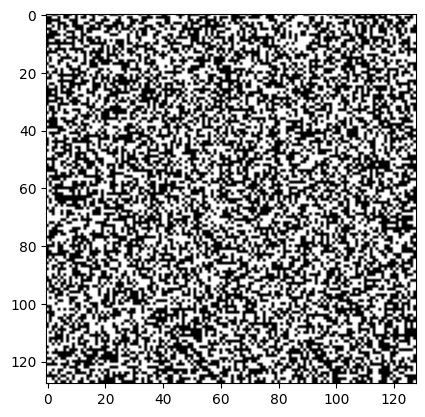

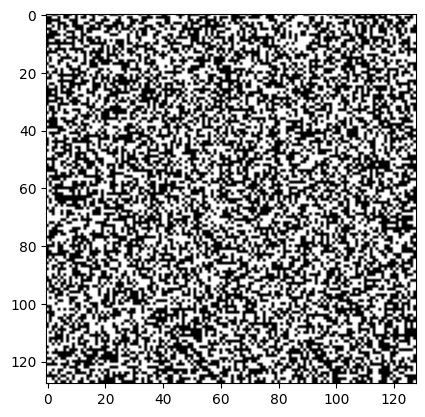

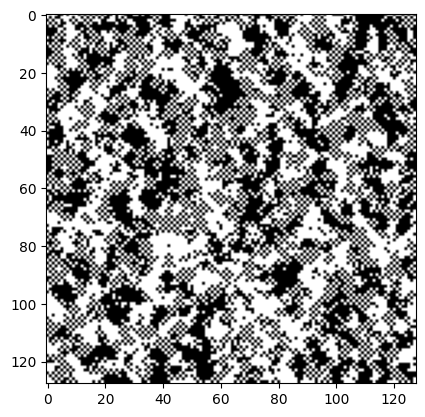

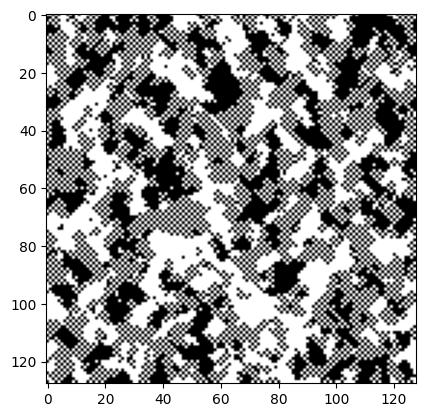

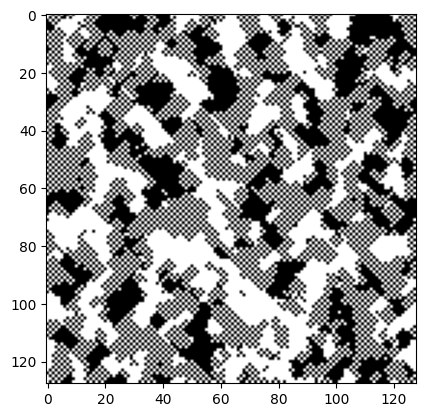

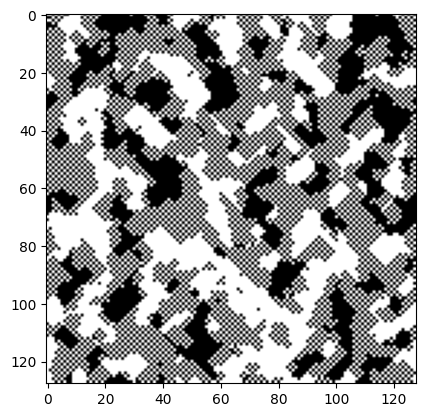

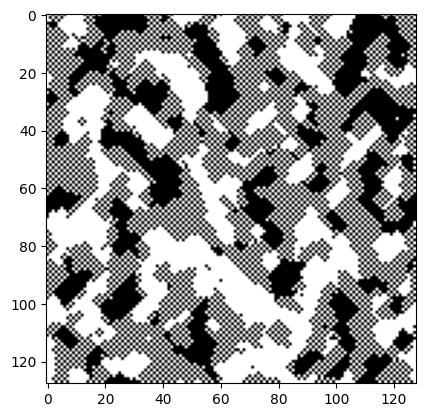

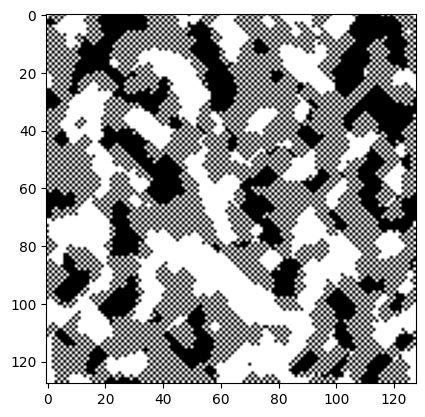

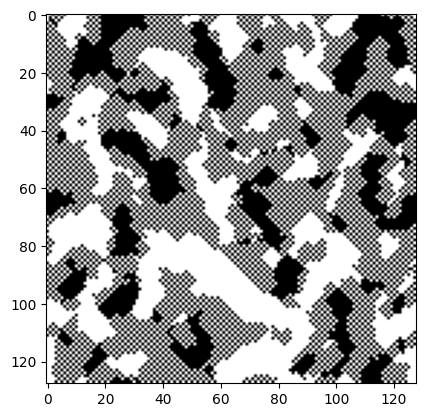

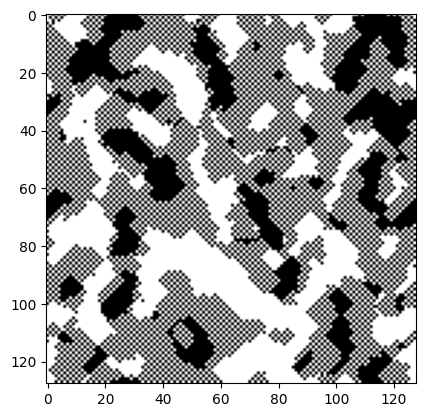

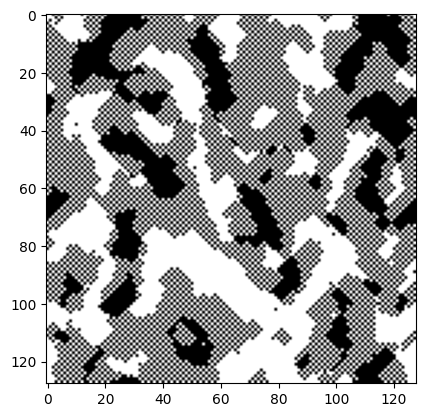

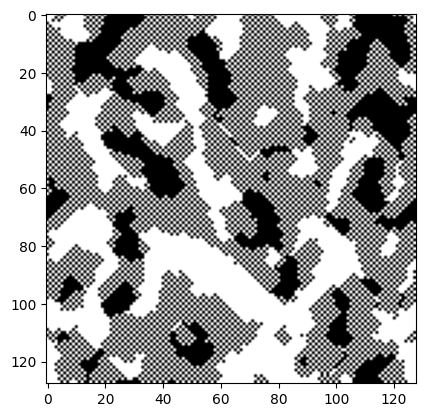

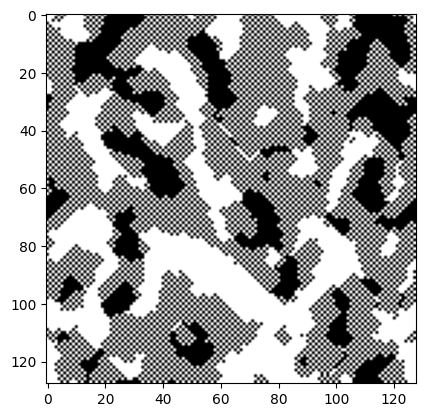

In [14]:

# random initialization of im_bin
plt.set_cmap('gray')
sh=[128,128]
im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)

beta_reg = 2

mafigure=plt.figure()
plt.imshow(im_bin);
mafigure.canvas.draw()
plt.show()

for n in range(10):
    echan(im_bin,beta_reg)
    plt.imshow(im_bin)
    mafigure.canvas.draw()
    plt.show(block=False)


plt.figure()
plt.imshow(im_bin)
plt.show()